In [52]:
%matplotlib inline

In [53]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt
import math

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display
from time import sleep

# the next cell is used for question a (the solution of two body)

In [54]:
class twobodygravitation():
    
    # input the initial value
    def __init__(self, m1=1.,m2=2.,G=1.
              ):
        self.m1=m1
        self.m2=m2
        self.G=G
        
    # the right side of the equation    
    def dy_dt(self,t,f):
        x_1,x_2,y_1,y_2,x_1_dot,x_2_dot,y_1_dot,y_2_dot = f
        delta_x = x_1-x_2
        delta_y = y_1-y_2
        function=-self.G*self.m1*self.m2*((delta_x)**2+(delta_y)**2)**(-1.5)
        
        x_1_dot_dot = function*delta_x/self.m1
        x_2_dot_dot = function*(-delta_x)/self.m2
        y_1_dot_dot = function*delta_y/self.m1
        y_2_dot_dot = function*(-delta_y)/self.m2
    
        return x_1_dot,x_2_dot,y_1_dot,y_2_dot,x_1_dot_dot,x_2_dot_dot,y_1_dot_dot,y_2_dot_dot
    
    #solve the equation
    def solve_ode(self,t_pts,x_1_0,x_2_0,y_1_0,y_2_0,x_1_dot_0,x_2_dot_0,y_1_dot_0,y_2_dot_0,abserr=1.0e-9,relerr=1.0e-9):
        y=[x_1_0,x_2_0,y_1_0,y_2_0,x_1_dot_0,x_2_dot_0,y_1_dot_0,y_2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1,x_2,y_1,y_2,x_1_dot,x_2_dot_0,y_1_dot_0,y_2_dot_0 =solution.y
        
        return x_1,x_2,y_1,y_2,x_1_dot,x_2_dot_0,y_1_dot_0,y_2_dot_0

        

# question b, one of them is heavier than the other，the small mass will orbit around the large one and the large one almost stay rest with a small oscillation due to the small mass

In [55]:
# enter initial values
m1=1.
m2=1000.
G=1.
t_start=0
t_end = 10000
delta_t = 0.1
t_pts=np.arange(t_start,t_end+delta_t,delta_t)
x_1_0=0.
x_2_0=0.
y_1_0=0.
y_2_0=1000. 
x_1_dot_0=1
x_2_dot_0=0
y_1_dot_0=0.
y_2_dot_0=0.

two = twobodygravitation(m1,m2,G)

x_1,x_2,y_1,y_2,x_1_dot,x_2_dot,y_1_dot,y_2_dot = two.solve_ode(t_pts,x_1_0,x_2_0,y_1_0,y_2_0,x_1_dot_0,x_2_dot_0,y_1_dot_0,y_2_dot_0) 


In [56]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [57]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

(<matplotlib.axes._subplots.AxesSubplot at 0x1c7b2f81148>,
 <matplotlib.lines.Line2D at 0x1c7b2fa4ec8>)

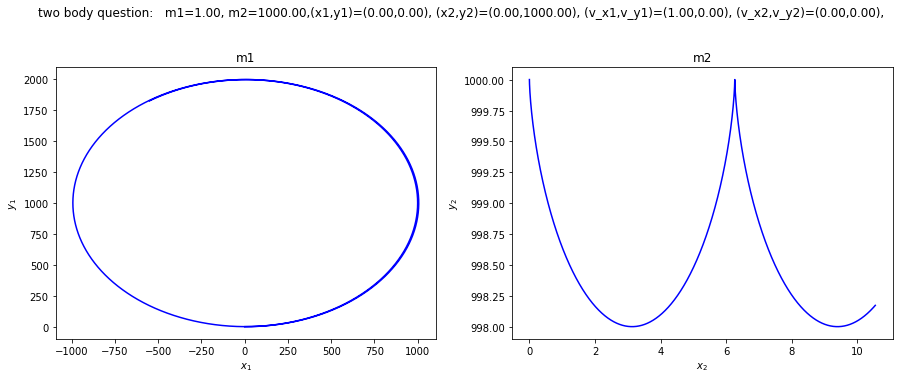

In [58]:
phi_vs_time_labels_1 = (r'$x_1$', r'$y_1$')
phi_vs_time_labels_2 = (r'$x_2$', r'$y_2$')

fig=plt.figure(figsize=(15,5))
overall_title = 'two body question:  ' + \
                rf' m1={m1:.2f},' + \
                rf' m2={m2:.2f},' + \
                rf'(x1,y1)=({x_1_0:.2f},{y_1_0:.2f}),' + \
                rf' (x2,y2)=({x_2_0:.2f},{y_2_0:.2f}),' + \
                rf' (v_x1,v_y1)=({x_1_dot_0:.2f},{y_1_dot_0:.2f}),' + \
                rf' (v_x2,v_y2)=({x_2_dot_0:.2f},{y_2_dot_0:.2f}),' + \
                '\n'     
fig.suptitle(overall_title, va='baseline')

#the first plot which correspond to the mass one
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title='m1', 
            ax=ax_a)    
                           
# the second plot which correspond to the mass two    
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title='m2', 
            ax=ax_b)    

# now it is time for animation

In [80]:
def update_plot(t_start=0.,t_end=0.,delta_t=0.,m1=0.,m2=0.,G=0.,x1=0.,x2=0.,y1=0.,y2=0.,x1_dot=0.,x2_dot=0.,y1_dot=0.,y2_dot=0.):
    t_pts=np.arange(t_start,t_end+delta_t,delta_t)
    two_body=twobodygravitation(m1=m1,m2=m2,G=G)
    x_1,x_2,y_1,y_2,x_1_dot,x_2_dot,y_1_dot,y_2_dot = two_body.solve_ode(t_pts,x1,x2,y1,y2,x1_dot,x2_dot,y1_dot,y2_dot)
    
    phi_vs_time_labels_1 = (r'$x_1$', r'$y_1$')
    phi_vs_time_labels_2 = (r'$x_2$', r'$y_2$')

    fig=plt.figure(figsize=(15,5))
    overall_title = 'two body question:  '    
    fig.suptitle(overall_title, va='baseline')

#the first plot which correspond to the mass one
    ax_a = fig.add_subplot(1,2,1)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=phi_vs_time_labels_1, 
            color='blue',
            label=None, 
            title='m1', 
            ax=ax_a)    
                           
# the second plot which correspond to the mass two    
    ax_b = fig.add_subplot(1,2,2)                  

    start, stop = start_stop_indices(t_pts, t_start, t_end)    
    plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=phi_vs_time_labels_2, 
            color='blue',
            label=None, 
            title='m2', 
            ax=ax_b)    

In [81]:
slider_border = Layout(border='solid 1.0px')

def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    return FloatSlider(value=value, min=min, max=max, step=step,
                       disabled=False,
                       description=description, continuous_update=False,
                       orientation='horizontal', layout=slider_border,
                       readout=True, readout_format=format)

In [98]:
m1=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$m1$ :', format='.1f')
m2=float_widget(value=1., min=1. ,max=1000., step=0.1,
                       description=r'$m2$ :', format='.1f')
G=float_widget(value=1., min=1. ,max=10., step=0.1,
                       description=r'$G$ :', format='.1f')
x_1_0=float_widget(value=0., min=-10. ,max=10., step=0.1,
                       description=r'$x_1$ :', format='.1f')
x_2_0=float_widget(value=0., min=-10. ,max=10., step=0.1,
                       description=r'$x_2$ :', format='.1f')
y_1_0=float_widget(value=0., min=-10 ,max=10, step=0.1,
                       description=r'$y_1$ :', format='.1f')
y_2_0=float_widget(value=10., min=-10 ,max=10, step=0.1,
                       description=r'$y_2$ :', format='.1f')
x_1_dot_0=float_widget(value=0., min=-5. ,max=5., step=0.1,
                       description=r'$\dot\x_1$ :', format='.1f')
x_2_dot_0=float_widget(value=0., min=-5 ,max=5., step=0.1,
                       description=r'$\dot\x_2$ :', format='.1f')
y_1_dot_0=float_widget(value=0., min=-5. ,max=5., step=0.1,
                       description=r'$\dot\y_1$ :', format='.1f')
y_2_dot_0=float_widget(value=0., min=-5. ,max=5., step=0.1,
                       description=r'$\dot\y_2$ :', format='.1f')
t_min_w = float_widget(value=0.0, min=0.0, max=10., step=0.1,
                       description=r'$t_{\rm min}$ :', format='.1f')

t_max_w = float_widget(value=10000.0, min=10., max=100000., step=0.1,
                       description=r'$t_{\rm max}$ :', format='.1f')

delta = float_widget(value=0.1, min=0.01, max=0.2, step=0.1,
                       description=r'$t_{\delta }$ :', format='.1f')


In [99]:
plot_out = widgets.interactive_output (update_plot,dict(t_start=t_min_w,t_end=t_max_w,delta_t=delta,m1=m1,m2=m2,G=G,x1=x_1_0,x2=x_2_0,y1=y_1_0,y2=y_2_0, x1_dot=x_1_dot_0,x2_dot=x_2_dot_0,y1_dot=y_1_dot_0,y2_dot=y_2_dot_0))

In [100]:
hbox_1=HBox([m1,m2,G])
hbox_2=HBox([x_1_0,y_1_0])
hbox_3=HBox([x_2_0,y_2_0])
hbox_4=HBox([x_1_dot_0,y_1_dot_0])
hbox_5=HBox([x_2_dot_0,y_2_dot_0])
hbox_6=HBox([t_min_w,t_max_w,delta])
UI_box=VBox([hbox_1,hbox_2,hbox_3,hbox_4,hbox_5,hbox_6,plot_out])

In [101]:
display(UI_box)